In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
data=pd.read_csv(r'E:\datascience\avocado.csv')

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.shape

(18249, 14)

In [6]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
data=data.drop(columns={'Unnamed: 0'})

In [31]:
data=data.drop(columns={'Date'})

In [69]:
data=data.drop(columns={'region'})

In [70]:
data=data.replace({'type':{'conventional':0,'organic':1}})

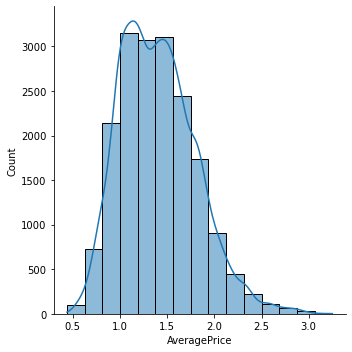

In [71]:
sns.displot(data['AveragePrice'], bins=15, kde=True)

In [74]:
X=data.drop(columns=['AveragePrice'])
y=data['AveragePrice']

In [75]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


In [76]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

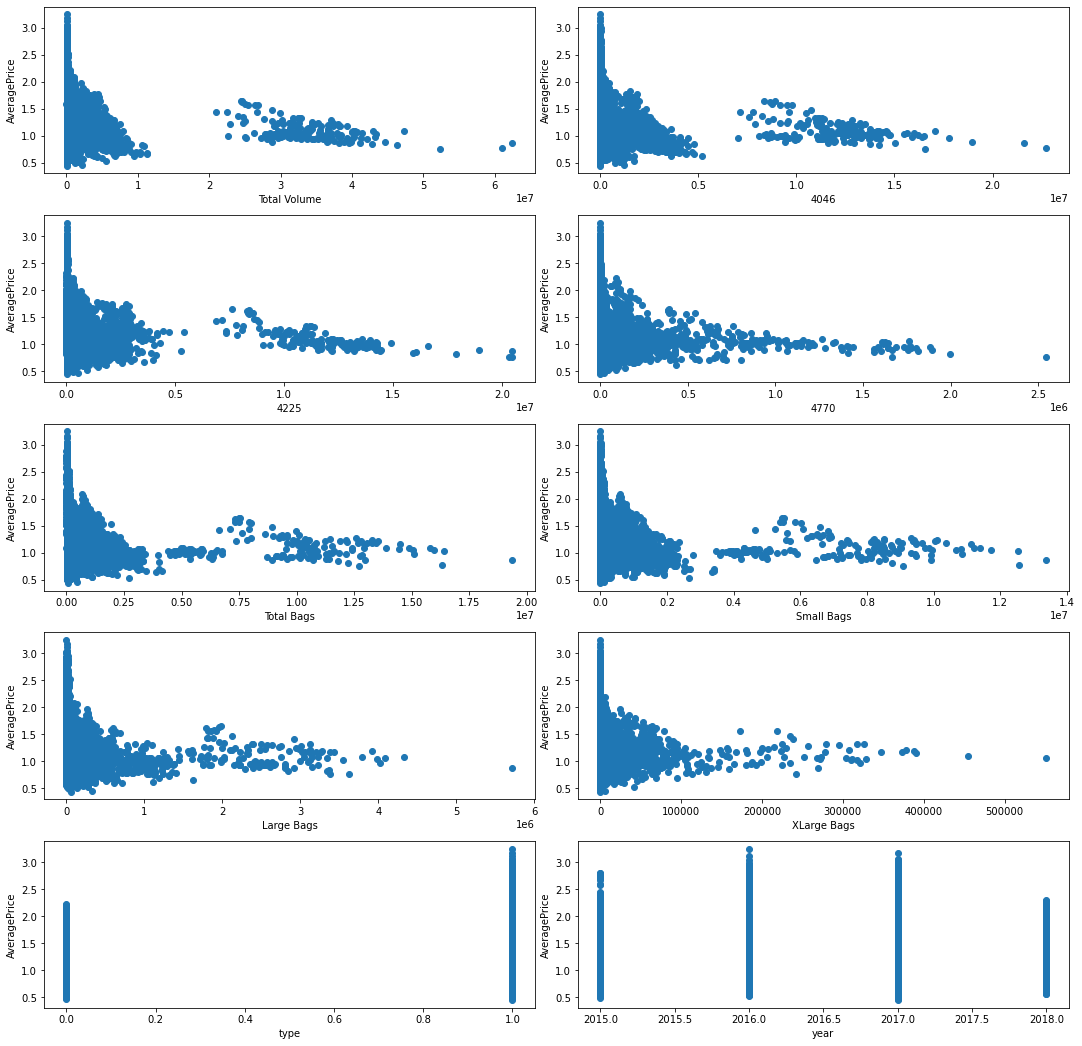

In [77]:
plt.figure(figsize=(15,20))
plotnumber=1

for column in x:
    if plotnumber<14:
        ax=plt.subplot(7,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('AveragePrice', fontsize=10)
        
    plotnumber+=1
    
plt.tight_layout()

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
y_train.head()

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
Name: AveragePrice, dtype: float64

In [80]:
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
16391,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.00,1,2017
4990,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.00,0,2016
13653,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.00,1,2016
2074,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.00,0,2015
12377,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.00,1,2016
...,...,...,...,...,...,...,...,...,...,...
11284,12946.65,2398.15,10206.13,0.00,342.37,342.37,0.00,0.00,1,2015
11964,1193.06,26.72,346.19,0.00,820.15,820.15,0.00,0.00,1,2016
5390,83407.69,992.24,54950.48,769.07,26695.90,26695.90,0.00,0.00,0,2016
860,277578.88,42766.16,140403.76,2028.31,92380.65,87952.58,2821.41,1606.66,0,2015


In [81]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [82]:
data.tail(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018


In [83]:
filename='finalized_mode.pickle'
pickle.dump(regression,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

In [84]:
regression.score(X_train,y_train)

0.40989794506298616

In [86]:
regression.score(X_test,y_test)

0.39247861820920626

In [87]:
y_pred=regression.predict(X_test)

In [88]:
y_pred

array([1.22809406, 1.10202246, 1.64889054, ..., 1.09705485, 1.68721082,
       1.68808831])

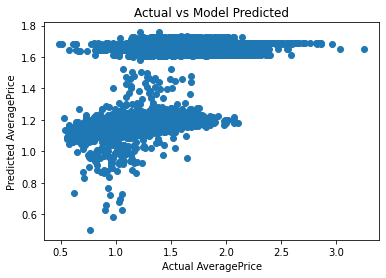

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual vs Model Predicted')
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
y_pred=regression.predict(X_test)

In [93]:
mean_absolute_error(y_test,y_pred)

0.24097655032667795

In [94]:
mean_squared_error(y_test, y_pred)

0.09760990350822661

In [95]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3124258368128773

In [96]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [98]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.06169833686772, tolerance: 0.2372350688540311
  model = cd_fast.enet_coordinate_descent(


LassoCV(max_iter=100, normalize=True)

In [99]:
alpha=lasscv.alpha_
alpha

2.0660949099588558e-06

In [100]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700.0122415496807, tolerance: 0.2372350688540311
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.0660949099588558e-06)

In [101]:
lasso_reg.score(X_test,y_test)

0.39239080089661793

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [108]:
data=pd.read_csv(r'E:\datascience\avocado.csv')

In [109]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [110]:
data.shape

(18249, 14)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [115]:
data=data.drop(['Unnamed: 0'],axis=1)

In [116]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [118]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [119]:
data=data.replace({'type':{'conventional':0,'organic':1}})

In [133]:
data=data.drop(columns={'Date'})

In [134]:
from sklearn.feature_selection import SelectKBest, f_classif

In [135]:
X=data.drop('region',axis=1)
y=data.region

In [136]:
best_features=SelectKBest(score_func=f_classif, k=8)
fit=best_features.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [138]:
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']

In [139]:
print(feature_scores.nlargest(8,'Score'))

   Feature_Name       Score
1  Total Volume  319.035278
3          4225  308.834412
6    Small Bags  298.998145
2          4046  295.483768
5    Total Bags  295.176645
7    Large Bags  254.735012
4          4770  208.050643
8   XLarge Bags  123.297554


In [141]:
newX=data[['Total Volume','4225','Small Bags','4046','Total Bags','Large Bags','4770','XLarge Bags']]

In [142]:
newX

,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags
0,64236.62,54454.85,8603.62,1036.74,8696.87,93.25,48.16,0.0
1,54876.98,44638.81,9408.07,674.28,9505.56,97.49,58.33,0.0
2,118220.22,109149.67,8042.21,794.70,8145.35,103.14,130.50,0.0
3,78992.15,71976.41,5677.40,1132.00,5811.16,133.76,72.58,0.0
4,51039.60,43838.39,5986.26,941.48,6183.95,197.69,75.78,0.0
...,...,...,...,...,...,...,...,...
18244,17074.83,1529.20,13066.82,2046.96,13498.67,431.85,0.00,0.0
18245,13888.04,3431.50,8940.04,1191.70,9264.84,324.80,0.00,0.0
18246,13766.76,2452.79,9351.80,1191.92,9394.11,42.31,727.94,0.0
18247,16205.22,2981.04,10919.54,1527.63,10969.54,50.00,727.01,0.0


In [143]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(newX)

In [144]:
from time import time

X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [146]:
knn=KNeighborsClassifier()
start=time()
knn.fit(X_train,y_train)
print("knn trainin Time:",(time()-start))

knn trainin Time: 0.21744322776794434


In [147]:
start=time()
y_pred=knn.predict(X_test)
print("knn test Time:",(time()-start))

knn test Time: 0.352916955947876


In [148]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[67,  0,  0, ...,  0,  0,  0],
       [ 0, 63,  0, ...,  0,  0,  0],
       [ 0,  3, 73, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 80,  0,  0],
       [ 0,  0,  0, ...,  0, 67,  0],
       [ 0,  3,  0, ...,  0,  0, 42]], dtype=int64)

In [149]:
print(classification_report(y_test,y_pred, digits=2))

                     precision    recall  f1-score   support

             Albany       0.59      0.83      0.69        81
            Atlanta       0.59      0.62      0.60       102
BaltimoreWashington       0.79      0.79      0.79        92
              Boise       0.60      0.77      0.67        81
             Boston       0.59      0.82      0.69        73
   BuffaloRochester       0.47      0.56      0.51        79
         California       0.85      0.88      0.87        78
          Charlotte       0.62      0.89      0.73        73
            Chicago       0.78      0.89      0.83        75
   CincinnatiDayton       0.54      0.55      0.54        82
           Columbus       0.55      0.57      0.56        83
      DallasFtWorth       0.66      0.72      0.69        89
             Denver       0.73      0.63      0.68        95
            Detroit       0.53      0.57      0.55        81
        GrandRapids       0.68      0.71      0.69        94
         GreatLakes    